In [1]:
#!pip install wordcloud
#!pip install matplotlib

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt

In [3]:
# CSV 파일에서 리뷰들을 읽어오기
df = pd.read_csv('reviews.csv', names=['review'], encoding='utf-8')
reviews = df['review'].tolist()

In [4]:
df['review'] = df['review'].str.replace('[^가-힣]', ' ', regex = True)
df['review']

0                                                  재미있어
1                                              다음에 또 할래
2                                               이거는 별로야
3                                                 그냥 그래
4                                            정말 재미있었어요 
5                                 별로였습니다  다시 보고 싶지 않네요 
6                                그저 그랬어요  중간에 좀 지루했습니다 
7                                                   평범해
8                                                  재미없어
9                                                   괜찮네
10                                                또 열어줘
11                                           내가  등 하고싶다
12                                              운동 하고싶다
13                                         저번이랑 너무 똑같은데
14                                            내일 또 해야겠다
15           이 챌린지는 정말로 흥미로웠고  많은 것을 배울 수 있었습니다  추천합니다 
16    챌린지를 시작하기 전에는 어려울 것 같았는데  차근차근 따라가니까 이해하기 쉬웠어요...
17    챌린지의 내용이 실용적이고 유익해서 일상 생활에 적용하기 좋았습니다  다른 

In [5]:
import konlpy
kkma = konlpy.tag.Kkma() # 형태소 분석기

nouns = df['review'].apply(kkma.nouns)
nouns

0                                                    []
1                                                  [다음]
2                                               [이거, 별]
3                                                    []
4                                                    []
5                                                   [별]
6                                                  [중간]
7                                                  [평범]
8                                                    []
9                                                    []
10                                                   []
11                                              [내가, 등]
12                                                 [운동]
13                                                 [저번]
14                                             [내일, 해야]
15                           [챌린지, 흥미, 웠, 웠고, 고, 수, 추천]
16                                 [챌린지, 시작, 전, 이해, 경험]
17               [챌린지, 내용, 실용적, 유익, 일상, 생활, 적용, 

In [6]:
nouns = nouns.explode()
nouns

0      NaN
1       다음
2       이거
2        별
3      NaN
      ... 
53      자기
53    자기관리
53      관리
53    스트레스
53     중요성
Name: review, Length: 284, dtype: object

In [7]:
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word

,word,count
1,다음,2.0
2,이거,2.0
6,중간,2.0
7,평범,2.0
11,내가,2.0
...,...,...
53,자기,2.0
53,자기관리,4.0
53,관리,2.0
53,스트레스,4.0


In [8]:
df_word = df_word.groupby('word', as_index = False).count().sort_values('count', ascending = False)
df_word

,word,count
100,챌린지,39
81,일상,6
34,도전,6
40,목표,5
98,참여,4
...,...,...
47,부여,1
42,믿음,1
39,리더십,1
38,동기부여,1


In [9]:
# 불필요한 단어 제거
df_word = df_word.iloc[3:, :]
df_word.head(5)

,word,count
40,목표,5
98,참여,4
9,관리,4
115,향상,4
36,도중,4


In [10]:
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

{'목표': 5,
 '참여': 4,
 '관리': 4,
 '향상': 4,
 '도중': 4,
 '참가자': 3,
 '발생': 3,
 '기회': 3,
 '방법': 3,
 '중요성': 3,
 '적용': 3,
 '자신감': 3,
 '자기': 3,
 '능력': 3,
 '흥미': 3,
 '계획': 3,
 '구성': 3,
 '유익': 2,
 '생활': 2,
 '성과': 2,
 '사람': 2,
 '과의': 2,
 '성장': 2,
 '성취감': 2,
 '변화': 2,
 '과제': 2,
 '발견': 2,
 '문제': 2,
 '소통': 2,
 '스트레스': 2,
 '습관': 2,
 '시간': 2,
 '자신': 2,
 '다양': 2,
 '경험': 2,
 '노력': 2,
 '업무': 2,
 '어려움': 2,
 '달성': 2,
 '실제': 2,
 '추천': 2,
 '효율적': 2,
 '훈련': 1,
 '작용': 1,
 '자기관리': 1,
 '자료': 1,
 '저번': 1,
 '일정': 1,
 '인연': 1,
 '이해': 1,
 '해결책': 1,
 '조언': 1,
 '체계적': 1,
 '한계': 1,
 '평범': 1,
 '편안': 1,
 '팀워크': 1,
 '커뮤니티': 1,
 '해야': 1,
 '커리큘럼': 1,
 '친구': 1,
 '취미': 1,
 '행동': 1,
 '중간': 1,
 '협업': 1,
 '창의': 1,
 '이거': 1,
 '형성': 1,
 '활동': 1,
 '진행': 1,
 '활용': 1,
 '해결': 1,
 '지속적': 1,
 '지식': 1,
 '가족': 1,
 '응원': 1,
 '도움': 1,
 '대화': 1,
 '단계별': 1,
 '다음': 1,
 '느낌': 1,
 '네트워킹': 1,
 '네트': 1,
 '내일': 1,
 '내용': 1,
 '내가': 1,
 '난이도': 1,
 '기와': 1,
 '기술': 1,
 '긍정적': 1,
 '극복': 1,
 '관점': 1,
 '관심사': 1,
 '과정': 1,
 '공유': 1,
 '계발': 1,
 '대화능력': 1,
 '도전

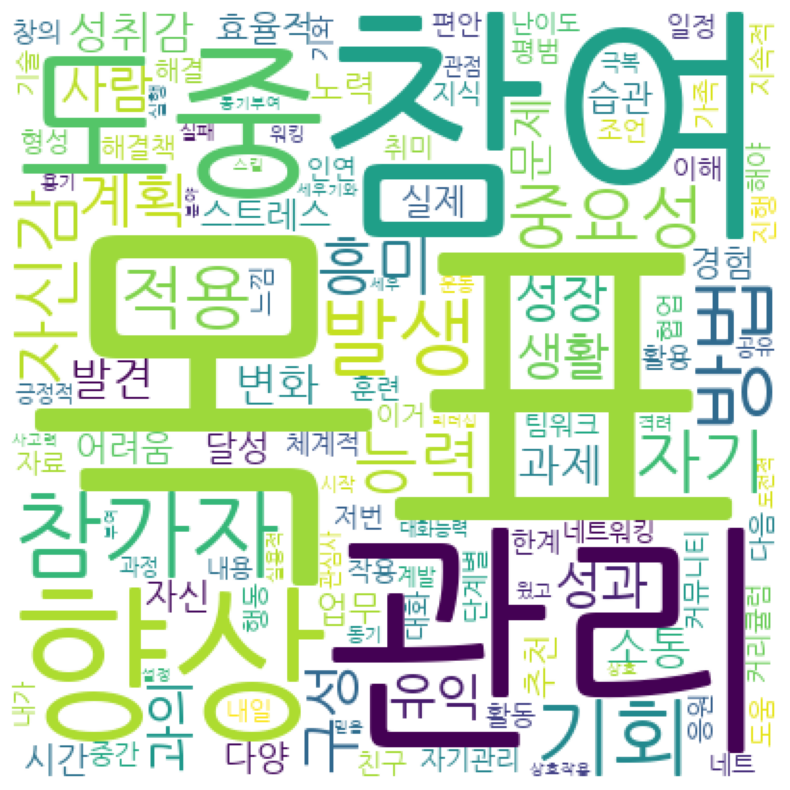

In [11]:
wc = WordCloud(random_state = 123, font_path = 'NanumGothic', width = 400, height = 400, background_color = 'white')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
plt.savefig('워드클라우드') # 파일 저장

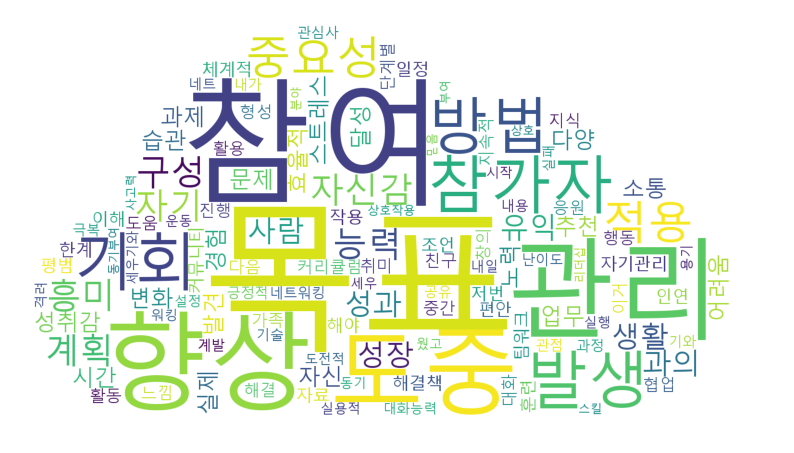

In [12]:
from PIL import Image  
import numpy as np  

# 마스크 이미지를 불러오기
mask = np.array(Image.open('cloud.png'))  

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='white', mask=mask).generate_from_frequencies(dic_word) 

# 워드 클라우드 출력
plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(wordcloud) # 결과 보여주기
plt.savefig('워드클라우드_구름') # 파일 저장